In [108]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
import matplotlib
from matplotlib.lines import Line2D

folder = '../../AfterFailure'

In [109]:
csvs = []

count_nan = 0
for i, file in enumerate(os.listdir(folder + '/csvs')):
    df = pd.read_csv(folder + '/csvs' + '/' + file)
    if (df.batch_size == 64).any():
        df.rename(columns={'Unnamed: 0' : 'epoch'}, inplace=True)
        count_nan += df.shape[0] * df.shape[1] - np.sum(df.count())
        df['list_index'] = len(csvs)
        filename = file.split("_")
        # print(filename[0][-2:].isdigit())
        if filename[0][-2:].isdigit(): df['exp'] = filename[0][-2:]
        else: df['exp'] = filename[0][-1]
        csvs.append(df)

print(f"Total number of Nans: {count_nan}")

Total number of Nans: 0


In [110]:
nan_index = []
for i, df in enumerate(csvs):
    nan_index.append(list(df[(df['val_acc'].isnull()) | (df['train_acc'].isnull()) |(df['train_updates'].isnull()) | (df['val_updates'].isnull())].index))

print(nan_index)

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


In [111]:
# weird_acc = []
# for i, df in enumerate(csvs):
#     weird_acc.append(list(df[(df['val_acc']>1) | (df['val_acc']<0.1) | (df['train_acc']>1) | (df['train_acc']<0.1)].index))
# # for df in csvs:
# #     df.drop(df[(df['val_acc']>1) | (df['val_acc']<0)].index, inplace = True)
#
# see = [csvs[i].iloc[l[0]] for i, l in enumerate(weird_acc) if l]
#
# early_stopped_dfs = []
# for i in range(len(csvs)):
#     n = nan_index[i]
#     v = weird_acc[i]
#     if n and v:
#         early_stopped_dfs.append(csvs[i].iloc[[min(min(v), min(n))]])
#     elif n:
#         early_stopped_dfs.append(csvs[i].iloc[[min(n)]])
#     elif v:
#         early_stopped_dfs.append(csvs[i].iloc[[min(v)]])
#

In [112]:
# early_stopped = pd.concat(early_stopped_dfs)
# early_stopped.drop(columns=['val_acc', 'train_acc', 'val_updates', 'train_updates', 'early_stopping'], inplace=True)
# print("Networks that stopped early")
# early_stopped
# csvs[0].columns
# csvs[2]
# for df in csvs:
#     print(len(df))

In [113]:
# manual_early_stopping = {4: 36,5: 28, 12: 12, 14:27, 32:18, 35:23, 41:35, 46: 12,53:12}
#
# for key, val in manual_early_stopping.items():
#     csvs[key].drop(labels = range(val, 40), inplace=True)

In [114]:
big_df = pd.concat(csvs)
big_df.describe()

,epoch,batch_size,cost_per_sample,hidden_units,learning_rate,surprisal_cost,trial,val_acc,val_updates,train_acc,train_updates,test_acc,test_updates,test_time,entropy_loss,budget_loss,list_index,surprisal_loss
count,1.80E+03,1.80E+03,1.80E+03,1.80E+03,1.80E+03,1.80E+03,1.80E+03,1.80E+03,1.80E+03,1.80E+03,1.80E+03,1.80E+03,1.80E+03,1.80E+03,1.80E+03,1.80E+03,1.80E+03,8.38E+02
mean,4.71E+01,6.40E+01,1.00E-03,3.20E+01,2.50E-04,4.65E-03,4.64E+00,7.55E-01,3.61E-01,7.66E-01,3.64E-01,7.51E-01,3.62E-01,1.12E+02,4.72E-01,8.38E-02,9.43E+00,5.75E-02
std,3.00E+01,0.00E+00,4.34E-19,0.00E+00,1.08E-19,4.99E-03,2.98E+00,8.45E-02,2.39E-01,9.20E-02,2.37E-01,8.40E-02,2.39E-01,2.59E+01,9.95E-02,5.47E-02,5.63E+00,2.14E-02
min,0.00E+00,6.40E+01,1.00E-03,3.20E+01,2.50E-04,0.00E+00,0.00E+00,4.96E-01,1.80E-02,4.84E-01,1.85E-02,4.98E-01,1.84E-02,4.11E+01,3.54E-01,4.26E-03,0.00E+00,0.00E+00
25%,2.20E+01,6.40E+01,1.00E-03,3.20E+01,2.50E-04,0.00E+00,2.00E+00,7.45E-01,2.83E-01,7.49E-01,2.98E-01,7.39E-01,2.85E-01,9.69E+01,3.99E-01,6.87E-02,5.00E+00,6.85E-02
50%,4.50E+01,6.40E+01,1.00E-03,3.20E+01,2.50E-04,0.00E+00,5.00E+00,7.88E-01,3.02E-01,8.04E-01,3.07E-01,7.85E-01,3.04E-01,1.22E+02,4.31E-01,7.06E-02,9.00E+00,6.86E-02
75%,6.90E+01,6.40E+01,1.00E-03,3.20E+01,2.50E-04,1.00E-02,7.00E+00,8.07E-01,3.22E-01,8.24E-01,3.14E-01,8.04E-01,3.24E-01,1.32E+02,5.17E-01,7.23E-02,1.40E+01,6.87E-02
max,1.24E+02,6.40E+01,1.00E-03,3.20E+01,2.50E-04,1.00E-02,9.00E+00,8.35E-01,1.00E+00,8.50E-01,1.00E+00,8.28E-01,1.00E+00,1.50E+02,6.95E-01,2.30E-01,1.90E+01,6.89E-02


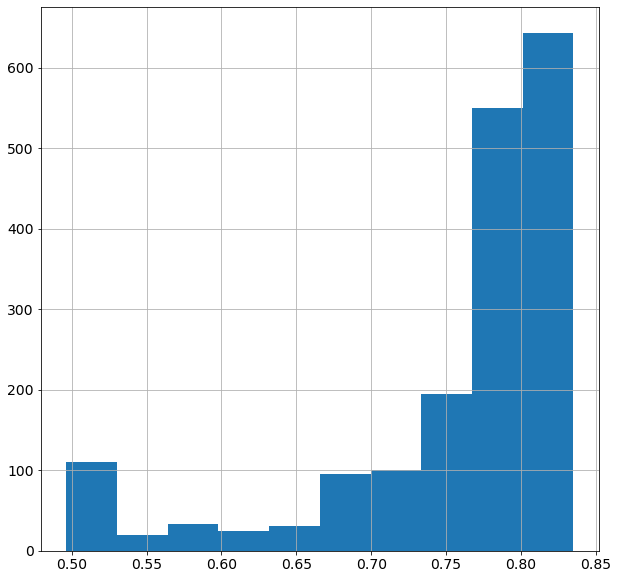

In [115]:
big_df['val_acc'].hist(figsize=(10, 10))

In [116]:
best_rows = []
best_accs = []
for df in csvs:
    best_accs.append(df.loc[:, 'test_acc'].max())
    best_rows.append(df.loc[df.loc[:, 'test_acc'].argmax()].to_dict())

In [117]:
best_df = pd.DataFrame(best_rows)
best_df = best_df.drop(columns= ["learning_rate", "hidden_units", "batch_size", "early_stopping"])

original = best_df[best_df['surprisal_cost'] == 0]
surprisal = best_df[best_df['surprisal_cost'] != 0]

In [118]:
print("No surprisal")
original

No surprisal


,epoch,cost_per_sample,surprisal_cost,trial,val_acc,val_updates,train_acc,train_updates,test_acc,test_updates,test_time,entropy_loss,budget_loss,list_index,exp,surprisal_loss
0,79,1.00E-03,0.00E+00,0,8.28E-01,3.32E-01,8.36E-01,3.12E-01,8.23E-01,3.34E-01,1.43E+02,3.82E-01,7.18E-02,0,0,NAN
1,103,1.00E-03,0.00E+00,5,8.23E-01,3.31E-01,8.38E-01,3.12E-01,8.25E-01,3.33E-01,7.38E+01,3.71E-01,7.18E-02,1,10,NAN
3,73,1.00E-03,0.00E+00,6,8.12E-01,3.16E-01,8.24E-01,3.10E-01,8.15E-01,3.18E-01,1.02E+02,3.97E-01,7.14E-02,3,12,NAN
5,46,1.00E-03,0.00E+00,7,7.99E-01,3.14E-01,8.09E-01,3.01E-01,7.98E-01,3.16E-01,9.48E+01,4.21E-01,6.94E-02,5,14,NAN
7,103,1.00E-03,0.00E+00,8,8.29E-01,3.32E-01,8.41E-01,2.97E-01,8.27E-01,3.34E-01,4.94E+01,3.74E-01,6.84E-02,7,16,NAN
9,124,1.00E-03,0.00E+00,9,8.35E-01,3.33E-01,8.50E-01,3.05E-01,8.28E-01,3.36E-01,4.64E+01,3.57E-01,7.03E-02,9,18,NAN
12,72,1.00E-03,0.00E+00,1,8.23E-01,3.46E-01,8.30E-01,3.14E-01,8.21E-01,3.48E-01,9.24E+01,3.94E-01,7.22E-02,12,2,NAN
14,93,1.00E-03,0.00E+00,2,8.35E-01,3.25E-01,8.39E-01,3.04E-01,8.28E-01,3.28E-01,5.60E+01,3.78E-01,7.01E-02,14,4,NAN
16,62,1.00E-03,0.00E+00,3,8.11E-01,3.37E-01,8.18E-01,3.10E-01,8.09E-01,3.38E-01,1.10E+02,4.03E-01,7.13E-02,16,6,NAN
18,103,1.00E-03,0.00E+00,4,8.31E-01,3.31E-01,8.35E-01,2.95E-01,8.23E-01,3.33E-01,6.82E+01,3.83E-01,6.79E-02,18,8,NAN


In [119]:
print("With surprisal")
surprisal

With surprisal


,epoch,cost_per_sample,surprisal_cost,trial,val_acc,val_updates,train_acc,train_updates,test_acc,test_updates,test_time,entropy_loss,budget_loss,list_index,exp,surprisal_loss
2,40,1.00E-03,1.00E-02,5,6.80E-01,9.99E-01,6.46E-01,9.99E-01,6.76E-01,9.99E-01,1.32E+02,6.49E-01,2.30E-01,2,11,3.77E-02
4,59,1.00E-03,1.00E-02,6,8.15E-01,3.25E-01,8.17E-01,3.22E-01,8.18E-01,3.27E-01,1.36E+02,4.03E-01,7.43E-02,4,13,6.86E-02
6,122,1.00E-03,1.00E-02,7,8.26E-01,3.46E-01,8.48E-01,3.17E-01,8.25E-01,3.48E-01,4.15E+01,3.54E-01,7.30E-02,6,15,6.85E-02
8,67,1.00E-03,1.00E-02,8,7.22E-01,1.00E+00,7.02E-01,9.99E-01,7.17E-01,1.00E+00,1.38E+02,5.94E-01,2.30E-01,8,17,3.90E-02
10,92,1.00E-03,1.00E-02,9,8.23E-01,2.97E-01,8.39E-01,3.06E-01,8.21E-01,3.00E-01,5.63E+01,3.69E-01,7.05E-02,10,19,6.86E-02
11,90,1.00E-03,1.00E-02,0,8.16E-01,3.15E-01,8.35E-01,3.01E-01,8.18E-01,3.19E-01,7.53E+01,3.85E-01,6.93E-02,11,1,6.86E-02
13,84,1.00E-03,1.00E-02,1,8.26E-01,3.37E-01,8.36E-01,3.10E-01,8.21E-01,3.40E-01,1.18E+02,3.77E-01,7.14E-02,13,3,6.85E-02
15,77,1.00E-03,1.00E-02,2,8.19E-01,3.48E-01,8.28E-01,3.03E-01,8.18E-01,3.49E-01,1.48E+02,3.92E-01,6.98E-02,15,5,6.86E-02
17,51,1.00E-03,1.00E-02,3,7.23E-01,1.00E+00,7.18E-01,9.99E-01,7.16E-01,1.00E+00,1.32E+02,5.92E-01,2.30E-01,17,7,3.91E-02
19,62,1.00E-03,1.00E-02,4,8.15E-01,3.26E-01,8.17E-01,3.00E-01,8.14E-01,3.30E-01,7.65E+01,4.14E-01,6.90E-02,19,9,6.86E-02


In [120]:
print("Dataframe with all best epochs for Validation accuracy")
best_df.sort_values(by='epoch')


Dataframe with all best epochs for Validation accuracy


,epoch,cost_per_sample,surprisal_cost,trial,val_acc,val_updates,train_acc,train_updates,test_acc,test_updates,test_time,entropy_loss,budget_loss,list_index,exp,surprisal_loss
2,40,1.00E-03,1.00E-02,5,6.80E-01,9.99E-01,6.46E-01,9.99E-01,6.76E-01,9.99E-01,1.32E+02,6.49E-01,2.30E-01,2,11,3.77E-02
5,46,1.00E-03,0.00E+00,7,7.99E-01,3.14E-01,8.09E-01,3.01E-01,7.98E-01,3.16E-01,9.48E+01,4.21E-01,6.94E-02,5,14,NAN
17,51,1.00E-03,1.00E-02,3,7.23E-01,1.00E+00,7.18E-01,9.99E-01,7.16E-01,1.00E+00,1.32E+02,5.92E-01,2.30E-01,17,7,3.91E-02
4,59,1.00E-03,1.00E-02,6,8.15E-01,3.25E-01,8.17E-01,3.22E-01,8.18E-01,3.27E-01,1.36E+02,4.03E-01,7.43E-02,4,13,6.86E-02
19,62,1.00E-03,1.00E-02,4,8.15E-01,3.26E-01,8.17E-01,3.00E-01,8.14E-01,3.30E-01,7.65E+01,4.14E-01,6.90E-02,19,9,6.86E-02
16,62,1.00E-03,0.00E+00,3,8.11E-01,3.37E-01,8.18E-01,3.10E-01,8.09E-01,3.38E-01,1.10E+02,4.03E-01,7.13E-02,16,6,NAN
8,67,1.00E-03,1.00E-02,8,7.22E-01,1.00E+00,7.02E-01,9.99E-01,7.17E-01,1.00E+00,1.38E+02,5.94E-01,2.30E-01,8,17,3.90E-02
12,72,1.00E-03,0.00E+00,1,8.23E-01,3.46E-01,8.30E-01,3.14E-01,8.21E-01,3.48E-01,9.24E+01,3.94E-01,7.22E-02,12,2,NAN
3,73,1.00E-03,0.00E+00,6,8.12E-01,3.16E-01,8.24E-01,3.10E-01,8.15E-01,3.18E-01,1.02E+02,3.97E-01,7.14E-02,3,12,NAN
15,77,1.00E-03,1.00E-02,2,8.19E-01,3.48E-01,8.28E-01,3.03E-01,8.18E-01,3.49E-01,1.48E+02,3.92E-01,6.98E-02,15,5,6.86E-02


In [121]:
print("Dataframe with one per trials")
# mean_df = best_df.groupby(by=["cost_per_sample", "surprisal_cost"])
# sorted = best_df.groupby(["cost_per_sample", "surprisal_cost"], sort="val_acc")
sorted = best_df.groupby(["cost_per_sample", "surprisal_cost"], sort="test_acc")
# sorted = best_df.groupby(["surprisal_cost"], sort="val_acc")
trial_mean = sorted.mean().reset_index()
# trial_cps_mean = best_df.groupby(["surprisal_cost"], sort="val_acc").mean().reset_index()
trial_mean

Dataframe with one per trials


,cost_per_sample,surprisal_cost,epoch,trial,val_acc,val_updates,train_acc,train_updates,test_acc,test_updates,test_time,entropy_loss,budget_loss,list_index,surprisal_loss
0,1.00E-03,0.00E+00,8.58E+01,4.50E+00,8.23E-01,3.30E-01,8.32E-01,3.06E-01,8.20E-01,3.32E-01,8.36E+01,3.86E-01,7.05E-02,8.50E+00,NAN
1,1.00E-03,1.00E-02,7.44E+01,4.50E+00,7.87E-01,5.29E-01,7.89E-01,5.16E-01,7.84E-01,5.31E-01,1.05E+02,4.53E-01,1.19E-01,1.05E+01,5.96E-02


In [122]:
trial_mean.columns

Index(['cost_per_sample', 'surprisal_cost', 'epoch', 'trial', 'val_acc',
       'val_updates', 'train_acc', 'train_updates', 'test_acc', 'test_updates',
       'test_time', 'entropy_loss', 'budget_loss', 'list_index',
       'surprisal_loss'],
      dtype='object')

In [123]:
# # Figure for last gridsearch.
# pd.set_option('display.float_format', '{:.2E}'.format)
# SMALL_SIZE = 14
# MEDIUM_SIZE = 14
# BIGGER_SIZE = 16
#
# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)
#
# # trial_mean['val_acc'].corr(trial_mean['surprisal_cost'], method='pearson')
# fig, ax = plt.subplots(figsize=(20, 18))
# cax = ax.scatter(x=np.log10(trial_mean['surprisal_cost']), y=trial_mean['val_acc'], c=np.log10(trial_mean['cost_per_sample']), marker='o', s=50)
# # ax.plot(np.log10(trial_cps_mean['surprisal_cost']), (trial_cps_mean['val_updates']/2520)*100, c='orange', label="mean")
# min = np.log10(trial_mean['cost_per_sample'].min())
# max = np.log10(trial_mean['cost_per_sample'].max())
# print(min, max)
# cmap = matplotlib.cm.get_cmap('viridis')
# norm = matplotlib.colors.Normalize(vmin=min, vmax=max)
# for id, row in trial_mean[trial_mean['surprisal_cost'] == 0].iterrows():
#     print(id, norm(np.log10(row['cost_per_sample'])))
#     ax.axhline(row['val_acc'], linestyle=':', color=cmap(norm(np.log10(row['cost_per_sample']))))
# plt.xticks([-4, -3, -2, -1], [0.0001, 0.001, 0.01, 0.1])
# plt.yticks([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], ["30%", "40%", "50%", "60%", "70%", "80%", "90%", "100%"])
# plt.ylim((0.3, 1.01))
# cbar = fig.colorbar(cax, ticks=np.log10(trial_mean['cost_per_sample']))
# cbar.ax.set_yticklabels(trial_mean['cost_per_sample'].apply(lambda x: '%1.0e'%x))
# cbar.set_label(r"$\lambda$", rotation=0, labelpad=15, size=MEDIUM_SIZE)
# ax.set_xlabel(r"$\gamma$")
# ax.set_ylabel("Accuracy")
# fig.suptitle(r"Influence of $\lambda$, $\gamma$ on words read")
# plt.legend([Line2D([0],[0],linestyle=':', c="black")], ['no surprisal'])
# plt.savefig("gridsearch_fig_accuracy.png")


In [124]:
# mean_df = mean_df.max()
# mean_df.sort_values(by='val_acc')
print("Clearer visualization")
# , axis=1, names=["acc_mean", "acc_std", "updates_mean",
# "updates_std"])
view = pd.DataFrame({'count': sorted.test_acc.count(),
                     'acc_mean': sorted.test_acc.mean(),
                     'acc_best': sorted.test_acc.max(),
                     'acc_worst': sorted.test_acc.min(),
                     'acc_std': sorted.test_acc.std(),
                     'updates_mean': sorted.test_updates.mean(),
                     'updates_std': sorted.test_updates.std(),
                     'epoch_mean': sorted.epoch.mean()})
# view.rename(columns=["acc_mean", "acc_std", "updates_mean", "updates_std"])
view[view['acc_mean'] > 0.75]

Clearer visualization


count  acc_mean  acc_best  acc_worst  acc_std  \
cost_per_sample surprisal_cost                                                  
1.00E-03        0.00E+00           10  8.20E-01  8.28E-01   7.98E-01 9.86E-03   
                1.00E-02           10  7.84E-01  8.25E-01   6.76E-01 5.74E-02   

                                updates_mean  updates_std  epoch_mean  
cost_per_sample surprisal_cost                                         
1.00E-03        0.00E+00            3.32E-01     9.48E-03    8.58E+01  
                1.00E-02            5.31E-01     3.24E-01    7.44E+01

In [125]:
# lr0001 = [csv for csv in csvs if csv['learning_rate'][0]==0.0001 and csv['hidden_units'][0]==32]

# temp = bs64_best.loc[(best_df['hidden_units']==96)]

In [126]:
if not os.path.exists(f"{folder}/plots"):
    os.makedirs(f"{folder}/plots")

for i, df in enumerate(csvs):
    # df.loc[:, ['val_updates', 'train_updates']] = df[['val_updates', 'train_updates']] / 2520
    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    a = df[['val_acc', 'train_acc']].plot(figsize= (20, 15), ax=ax1, legend=None)
    ax1.set_ylim(0, 1.01)
    ax1.set_ylabel("Accuracy")
    # ax1.legend(loc=2)
    lns = ax1.get_lines()
    ax2 = ax1.twinx()
    b = df['val_updates'].plot(ax=ax2, c='r', label="val_updates")
    c = df['train_updates'].plot(ax=ax2, c='g', label="train_updates")
    ax2.set_ylabel("Updates")
    ax2.set_ylim(0, 1.01)
    # lns.append(ax2.get_lines)
    # labs = [l.get_label() for l in lns]
    fig.legend(bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
    fig.savefig(f"{folder}/plots/idx{i}_acc{round(best_accs[i], 2)}_cps{csvs[i].cost_per_sample[0]}_s{csvs[i].surprisal_cost[0]}_exp{csvs[i].exp[0]}.png")
    plt.clf()

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

In [127]:
# if not os.path.exists(f"{folder}/lrplots"):
#     os.makedirs(f"{folder}/lrplots")
#
# for i, df in enumerate(lr0001):
#     df[['val_acc', 'train_acc']].plot().get_figure().savefig(f"{folder}/lrplots/idx{i}.png")
#

In [128]:
# best_hyper = pd.concat(lr0001)
#
# best_hyper_diff = best_hyper['val_acc'].diff(15)
# best_hyper_diff.abs().mean()


In [132]:
s_read_vocab = []
s_skipped_vocab = []
ns_read_vocab = []
ns_skipped_vocab = []

s_read_surp = []
s_skipped_surp = []
ns_read_surp = []
ns_skipped_surp = []

i=0
for file in os.listdir(folder + '/analysis'):
    file = folder + '/analysis/' + file
    if "pkl" in file:
        if "SC0.01" in file:
            if "non" in file:
                s_skipped_vocab.append(pickle.load(open(file, 'rb')))
            else:
                s_read_vocab.append(pickle.load(open(file, 'rb')))
        else:
            if "non" in file:
                ns_skipped_vocab.append(pickle.load(open(file, 'rb')))
            else:
                ns_read_vocab.append(pickle.load(open(file, 'rb')))
    else:
        if "SC0.01" in file:
            if "non" in file:
                s_skipped_surp.append(np.load(open(file, 'rb')))
            else:
                s_read_surp.append(np.load(open(file, 'rb')))
        else:
            if "non" in file:
                ns_skipped_surp.append(np.load(open(file, 'rb')))
            else:
                ns_read_surp.append(np.load(open(file, 'rb')))
    i += 1

print(f"{i} files were condsidered ({i/4} experiments)")

80 files were condsidered (20.0 experiments)


2237662
1125253
6.387508409219971
6.365750948981571


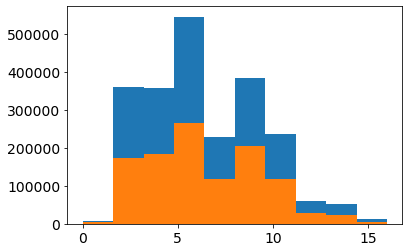

In [133]:
nsr_surp = ns_read_surp[0]
nss_surp = ns_skipped_surp[0]

print(len(nss_surp))
print(len(nsr_surp))

print(nsr_surp.mean())
print(nss_surp.mean())

plt.hist(nss_surp)
plt.hist(nsr_surp)
plt.show()



skipped length 1837
read length 3361078
read surprisal 6.3743171089751565
skipped surprisal 4.020141535111595


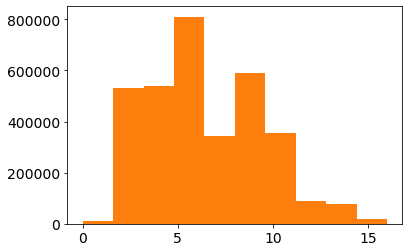

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [134]:
sr_surp = s_read_surp[0]
ss_surp = s_skipped_surp[0]

print(f"skipped length {len(ss_surp)}")
print(f"read length {len(sr_surp)}")

print(f"read surprisal {sr_surp.mean()}")
print(f"skipped surprisal {ss_surp.mean()}")

plt.hist(ss_surp)
plt.hist(sr_surp)
plt.show()

# print(ss_surp)

print(np.count_nonzero(sr_surp == 0))
print(np.count_nonzero(ss_surp == 0))

print(s_skipped_vocab)
print(s_read_vocab)
